In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 가져오기

```python
# 자료 디렉토리 링크
os.system("mkdir -p ~/aiffel/bike_regression/data")
os.system("ln -s ~/data/data/* ~/aiffel/bike_regression/data")
```

In [2]:
bikesd = pd.read_csv('~/aiffel/bike_regression/data/bike-sharing-demand/train.csv')
print(bikesd.shape)
bikesd.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [97]:
# bikesd.columns
target= 'count'
features = bikesd.columns.drop(target)
print(bikesd[target])

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64


### 자료형 변환, 컬럼 생성

In [5]:
# pd.to_datetime(bikesd['datetime']).dt.year.head()
bikesd['datetime'] = pd.to_datetime(bikesd['datetime'])
bikesd['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [6]:
bikesd['year'] = bikesd['datetime'].dt.year
bikesd['month'] = bikesd['datetime'].dt.month
bikesd['day'] = bikesd['datetime'].dt.day
bikesd['hour'] = bikesd['datetime'].dt.hour
bikesd['minute'] = bikesd['datetime'].dt.minute
bikesd['second'] = bikesd['datetime'].dt.second
bikesd.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### 데이터 개수 시각화

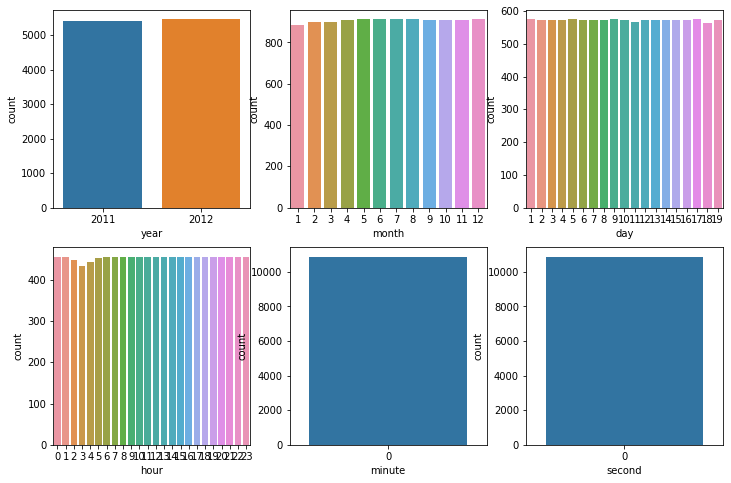

In [7]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3 )
fig.set_size_inches(12, 8)

sns.countplot(data=bikesd, x="year", ax=ax1)
sns.countplot(data=bikesd, x="month", ax=ax2)
sns.countplot(data=bikesd, x="day", ax=ax3)
sns.countplot(data=bikesd, x="hour", ax=ax4)
sns.countplot(data=bikesd, x="minute", ax=ax5)
sns.countplot(data=bikesd, x="second", ax=ax6)
plt.show()

### X, y 컬럼 선택 및 train/test 데이터 분리

In [9]:
df_y = bikesd[target]
df_y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [54]:
# 불필요한 컬럼 제거
# features = features.drop(['datetime','casual','registered'])

df_X = bikesd[features]
df_X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4,0,0


In [55]:
# 원핫인코딩
df_X = pd.get_dummies(df_X, columns=[
        'season', 'weather', 'month', 'day', 'hour'])
df_X.head()

,holiday,workingday,temp,atemp,humidity,windspeed,year,minute,second,season_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,9.84,14.395,81,0.0,2011,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0,2011,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,13.635,80,0.0,2011,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,14.395,75,0.0,2011,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,14.395,75,0.0,2011,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            df_X, df_y, test_size=0.2, random_state=63)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train.head()

(8708, 72) (8708,)
(2178, 72) (2178,)


,holiday,workingday,temp,atemp,humidity,windspeed,year,minute,second,season_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
287,0,1,6.56,6.820,50,23.9994,2011,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5814,0,1,13.94,17.425,87,7.0015,2012,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10600,0,0,14.76,17.425,93,8.9981,2012,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7393,0,1,21.32,25.000,77,12.9980,2012,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6888,0,1,14.76,17.425,46,15.0013,2012,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### LinearRegression 모델 학습

In [216]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [217]:
#train 데이터로 Linear Regression 모델 학습
model.fit(X_train, y_train)

LinearRegression()

```python
# 러닝 커브 그리기; 잘 모르겠다.
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    model, df_X, df_y, train_sizes=np.linspace(0.1, 1.0, 10))

plt.plot(train_sizes, train_scores)
# plt.plot(train_sizes, valid_scores)
```

### 예측값 출력 및 손실함수값 계산

In [231]:
# R-squared 점수
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print((score_train, score_test))

(0.6961845179020236, 0.6854939205888495)


In [232]:
# R-squared 점수에서 역산한 MSE
print((1-score_train)*y_train.var())
print((1-score_test)*y_test.var())

9849.64491964509
10811.917975361433


In [233]:
# test 데이터에서 얻은 모델의 예측 값
y_pred = model.predict(X_test)

In [234]:
# 패키지내 MSE함수, RSME 계산
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print((mse, rmse))

(10806.953825694141, 103.95649967988602)


### 예측 결과 시각화하기

In [235]:
X_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,year,minute,second,season_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
5500,0,1,0.82,2.275,44,12.9980,2012,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3338,0,1,29.52,34.850,79,8.9981,2011,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3474,0,0,30.34,34.850,66,11.0014,2011,0,0,0,...,0,0,1,0,0,0,0,0,0,0
726,0,0,16.40,20.455,30,19.9995,2011,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2620,0,1,22.96,26.515,94,7.0015,2011,0,0,0,...,0,0,0,0,0,0,0,0,0,0


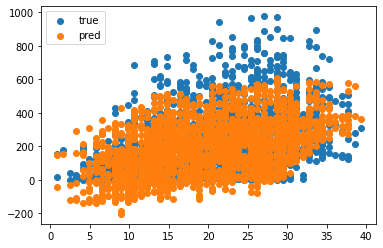

In [236]:
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], y_pred, label="pred")
plt.legend()
plt.show()